<a href="https://colab.research.google.com/github/shreya0202/ImageClassification/blob/main/ImageClass_Scene15_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries

import os
import gc
import time
import numpy as np
from matplotlib import pyplot as plt
from zipfile import ZipFile
from PIL import Image
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Dense, Flatten, Dropout
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping

In [ ]:
# Defining Scene 15 dataset path

if('scene15_dataset' not in os.listdir('/content/drive/MyDrive/')):
    zippath = '/content/drive/MyDrive/15-Scene.zip'
    with ZipFile(zippath, 'r') as zipref:
        zipref.extractall('/content/drive/MyDrive/scene15_dataset')
        
data_path = '/content/drive/MyDrive/scene15_dataset/15-Scene/'
os.chdir(data_path)

In [ ]:
# Specifying total classes in dataset

folders = os.listdir()
folders.sort()
num_classes = len(folders)
print("Number of classes: {}".format(num_classes))

Number of classes: 15


In [ ]:
# Importing files and seperating data and labels

all_images = []
all_labels = []

for i in range(15):
    folder_path = data_path + folders[i] + '/'
    each_folder = os.listdir(folder_path)
    each_folder.sort()
    num_imgs = len(each_folder)
    folder_list = []
    for j in range(num_imgs):
        img_path = folder_path + each_folder[j]
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = np.array(img)
        if(len(np.shape(img)) == 2):
            img = np.dstack((img, img, img))
        img = preprocess_input(img)
        all_images.append(img)
        all_labels.append(i)

    print("Folder {}\tImages: {}\tDone...".format(i, num_imgs))
    
print("\n======DONE======\n")
print("Total images: {}\t{}".format(len(all_images), type(all_images)))
print("Total labels: {}\t{}".format(len(all_labels), type(all_labels)))

Folder 0	Images: 216	Done...
Folder 1	Images: 241	Done...
Folder 2	Images: 311	Done...
Folder 3	Images: 210	Done...
Folder 4	Images: 289	Done...
Folder 5	Images: 360	Done...
Folder 6	Images: 328	Done...
Folder 7	Images: 260	Done...
Folder 8	Images: 308	Done...
Folder 9	Images: 374	Done...
Folder 10	Images: 410	Done...
Folder 11	Images: 292	Done...
Folder 12	Images: 356	Done...
Folder 13	Images: 215	Done...
Folder 14	Images: 315	Done...

======DONE======

Total images: 4485	<class 'list'>
Total labels: 4485	<class 'list'>


In [ ]:
# Converting to numpy arrays

new_all_images = np.asanyarray(all_images)
new_all_labels = np.asanyarray(all_labels)

print(type(new_all_images))
print(type(new_all_labels))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Train Test Split

train_data, test_data, train_labels, test_labels = train_test_split(new_all_images, new_all_labels, test_size=0.2)
train_labels = keras.utils.to_categorical(train_labels, num_classes=15)
test_labels = keras.utils.to_categorical(test_labels, num_classes=15)
print("Train samples: {}".format(len(train_data)))
print("Train labels: {}".format(len(train_labels)))
print("Test samples: {}".format(len(test_data)))
print("Test labels: {}".format(len(test_labels)))

Train samples: 3588
Train labels: 3588
Test samples: 897
Test labels: 897


In [ ]:
# Calling VGG16 model for random weights

model0 = VGG16(weights=None, input_shape=(224, 224, 3), include_top=False, classes=15)

# Calling VGG16 modell for imagenet weights

model1 = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False, classes=15)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# Different Learning Rates for different epochs

def lr_schedule(epoch):
    if(epoch <= 10):
        return 1e-4
    elif(epoch <= 20):
        return 1e-5
    elif(epoch <= 30):
        return 1e-6
    else:
        return 1e-7

In [ ]:
# Garbage Collection

gc.collect()

624

In [ ]:
# Creating layers for Model 0

x0 = model0.get_layer('block5_pool').output
x0 = Flatten(name='flatten')(x0)
x0 = Dense(512, activation='relu', name='dense1')(x0)
x0 = Dropout(0.5)(x0)
x0 = Dense(4096, activation='relu', name='dense2')(x0)
x0 = Dropout(0.5)(x0)
x0 = Dense(15, activation='softmax', name='classifier')(x0)

new_model_0 = Model(inputs=model0.input, outputs=x0)

new_model_0.save_weights('/content/drive/MyDrive/scene_initial_model_0.h5')

In [ ]:
# Model 0 Summary

new_model_0.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# Creating layers for Model 1

x1 = model1.get_layer('block5_pool').output
x1 = Flatten(name='flatten')(x1)
x1 = Dense(512, activation='relu', name='dense1')(x1)
x1 = Dropout(0.5)(x1)
x1 = Dense(4096, activation='relu', name='dense2')(x1)
x1 = Dropout(0.5)(x1)
x1 = Dense(15, activation='softmax', name='classifier')(x1)

new_model_1 = Model(inputs=model1.input, outputs=x1)

new_model_1.save_weights('/content/drive/MyDrive/scene_initial_model_1.h5')

In [ ]:
# Model 1 summary

new_model_1.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# Creating Log files for Model 0 and Model 1

tensorboard_model0_scene = TensorBoard(log_dir='/content/drive/MyDrive/logs_scene/model_0/{}'.format(time.time()))
tensorboard_model1_scene = TensorBoard(log_dir='/content/drive/MyDrive/logs_scene/model_1/{}'.format(time.time()))

In [ ]:
# Training and Testing Model 0 for VGG16 with random weights

training_runs_model0 = []

for i in range(3):
    new_model_0.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
    keras.callbacks.LearningRateScheduler(lr_schedule)
    print("Training Run #{}\n".format(i+1))
    model_history = new_model_0.fit(train_data, train_labels, shuffle=True, batch_size=64, epochs=20, verbose=1, validation_data=(test_data, test_labels), callbacks=[tensorboard_model0_scene])
    training_runs_model0.append(model_history)
    new_model_0.get_weights()
    if(i == 2):
        new_model_0.save_weights('scene_final_model_0.h5')
    else:
        new_model_0.load_weights('scene_initial_model_0.h5')
    print("\n\n")

Training Run #1

Epoch 1/20
 1/57 [..............................] - ETA: 0s - loss: 2.7860 - acc: 0.0625WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
57/57 [==============================] - 49s 853ms/step - loss: 2.6878 - acc: 0.0833 - val_loss: 2.5698 - val_acc: 0.1070
Epoch 2/20
57/57 [==============================] - 51s 889ms/step - loss: 2.4952 - acc: 0.1511 - val_loss: 2.2756 - val_acc: 0.2408
Epoch 3/20
57/57 [==============================] - 50s 881ms/step - loss: 2.2281 - acc: 0.2609 - val_loss: 2.7983 - val_acc: 0.1427
Epoch 4/20
57/57 [==============================] - 50s 884ms/step - loss: 2.1670 - acc: 0.2862 - val_loss: 1.8087 - val_acc: 0.3913
Epoch 5/20
57/57 [==============================] - 50s 880ms/step - loss: 1.8987 - acc: 0.3813 

In [ ]:
# Training and Testing Model 1 for VGG16 with imagenet weights

training_runs_model1 = []

for i in range(3):
    new_model_1.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['acc'])
    keras.callbacks.LearningRateScheduler(lr_schedule)
    print("Training Run #{}\n".format(i+1))
    model_history = new_model_1.fit(train_data, train_labels, shuffle=True, batch_size=64, epochs=20, verbose=1, validation_data=(test_data, test_labels), callbacks=[tensorboard_model1_scene])
    training_runs_model1.append(model_history)
    new_model_1.get_weights()
    if(i == 2):
        new_model_1.save_weights('/content/drive/MyDrive/scene_final_model_1.h5')
    else:
        new_model_1.load_weights('/content/drive/MyDrive/scene_initial_model_1.h5')
    print("\n\n")

Training Run #1

Epoch 1/20
57/57 [==============================] - 52s 913ms/step - loss: 2.4806 - acc: 0.2166 - val_loss: 1.8037 - val_acc: 0.3980
Epoch 2/20
57/57 [==============================] - 51s 888ms/step - loss: 1.5095 - acc: 0.4838 - val_loss: 1.1978 - val_acc: 0.5931
Epoch 3/20
57/57 [==============================] - 51s 901ms/step - loss: 1.1139 - acc: 0.6118 - val_loss: 0.8008 - val_acc: 0.7179
Epoch 4/20
57/57 [==============================] - 51s 898ms/step - loss: 0.8690 - acc: 0.7018 - val_loss: 0.8400 - val_acc: 0.7469
Epoch 5/20
57/57 [==============================] - 51s 898ms/step - loss: 0.6373 - acc: 0.7809 - val_loss: 0.5997 - val_acc: 0.7882
Epoch 6/20
57/57 [==============================] - 51s 895ms/step - loss: 0.5201 - acc: 0.8202 - val_loss: 0.5732 - val_acc: 0.8094
Epoch 7/20
57/57 [==============================] - 51s 899ms/step - loss: 0.4021 - acc: 0.8590 - val_loss: 0.5066 - val_acc: 0.8450
Epoch 8/20
57/57 [==============================] - 

In [ ]:
# Calculating Average Training and Testing accuracies for Model 0 and Model 1

tr_acc_mod0_0 = training_runs_model0[0].history['acc']
tr_acc_mod0_1 = training_runs_model0[1].history['acc']
tr_acc_mod0_2 = training_runs_model0[2].history['acc']

tr_acc_mod1_0 = training_runs_model1[0].history['acc']
tr_acc_mod1_1 = training_runs_model1[1].history['acc']
tr_acc_mod1_2 = training_runs_model1[2].history['acc']

ts_acc_mod0_0 = training_runs_model0[0].history['val_acc']
ts_acc_mod0_1 = training_runs_model0[1].history['val_acc']
ts_acc_mod0_2 = training_runs_model0[2].history['val_acc']

ts_acc_mod1_0 = training_runs_model1[0].history['val_acc']
ts_acc_mod1_1 = training_runs_model1[1].history['val_acc']
ts_acc_mod1_2 = training_runs_model1[2].history['val_acc']

tot_tr_acc_mod0 = np.sum(tr_acc_mod0_0) + np.sum(tr_acc_mod0_1) + np.sum(tr_acc_mod0_2)
avg_tr_acc_mod0 = tot_tr_acc_mod0 / 60
print("Avg training accuracy (random weights): {}".format(avg_tr_acc_mod0))

tot_tr_acc_mod1 = np.sum(tr_acc_mod1_0) + np.sum(tr_acc_mod1_1) + np.sum(tr_acc_mod1_2)
avg_tr_acc_mod1 = tot_tr_acc_mod1 / 60
print("Avg training accuracy (\'imagenet\' weights): {}".format(avg_tr_acc_mod1))

print()

tot_ts_acc_mod0 = np.sum(ts_acc_mod0_0) + np.sum(ts_acc_mod0_1) + np.sum(ts_acc_mod0_2)
avg_ts_acc_mod0 = tot_ts_acc_mod0 / 60
print("Avg testing accuracy (random weights): {}".format(avg_ts_acc_mod0))

tot_ts_acc_mod1 = np.sum(ts_acc_mod1_0) + np.sum(ts_acc_mod1_1) + np.sum(ts_acc_mod1_2)
avg_ts_acc_mod1 = tot_ts_acc_mod1 / 60
print("Avg testing accuracy (\'imagenet\' weights): {}".format(avg_ts_acc_mod1))

Avg training accuracy (random weights): 0.6067679259926081
Avg training accuracy ('imagenet' weights): 0.8268673345446587

Avg testing accuracy (random weights): 0.5437755486617486
Avg testing accuracy ('imagenet' weights): 0.7808435509602228


In [ ]:
# Function to plot data

def plotData(ephochs, mod0, mod1, title):
  plt.plot(range(epochs), mod0, 'or-', label='Random Weights')
  plt.plot(range(epochs), mod1, 'ob-', label='ImageNet Weights')
  plt.legend()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(title)
  plt.show()

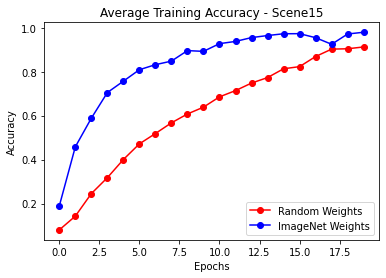

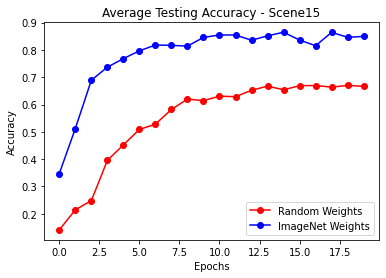

In [ ]:
# Plotting Mean Train and Test accuracies for Model 0 and 1

epochs = 20

mean_tr_acc_mod0 = np.add(np.add(tr_acc_mod0_0, tr_acc_mod0_1), tr_acc_mod0_2) / 3
mean_tr_acc_mod1 = np.add(np.add(tr_acc_mod1_0, tr_acc_mod1_1), tr_acc_mod1_2) / 3

mean_ts_acc_mod0 = np.add(np.add(ts_acc_mod0_0, ts_acc_mod0_1), ts_acc_mod0_2) / 3
mean_ts_acc_mod1 = np.add(np.add(ts_acc_mod1_0, ts_acc_mod1_1), ts_acc_mod1_2) / 3


title1 = 'Average Training Accuracy - Scene15'
title2 = 'Average Testing Accuracy - Scene15'
plotData(epochs, mean_tr_acc_mod0, mean_tr_acc_mod1, title1)
plotData(epochs, mean_ts_acc_mod0, mean_ts_acc_mod1, title2)
